In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales = pd.read_csv("SalesData.csv")

### 1. Compare Sales by region for 2016 with 2015 using bar chart

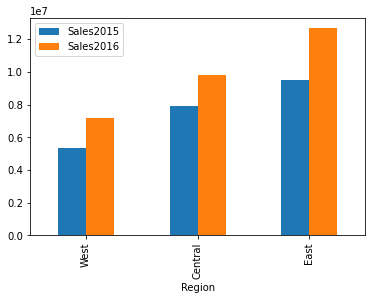

In [65]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1=sales.groupby(by=['Region'])[['Sales2015','Sales2016']].sum().round(2)

sales1graph=sales1.sort_values(by=['Sales2015','Sales2016']).plot.bar()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

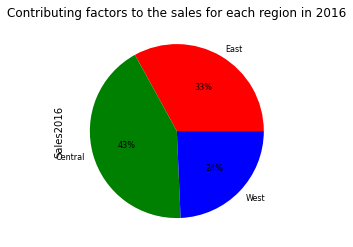

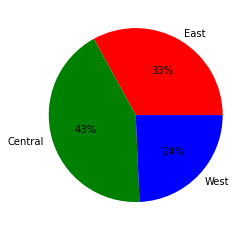

In [66]:
Pie = sales.groupby(['Region']).Sales2016.sum()

Pie.plot(kind='pie', 
            labels=['East','Central','West'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=8, 
            subplots='true')
plt.title('Contributing factors to the sales for each region in 2016')
plt.show()


#method 2 (without overlapping)

plt.pie(Pie, labels=['East','Central','West'],colors=['r', 'g', 'b'],
            autopct='%1.0f%%')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

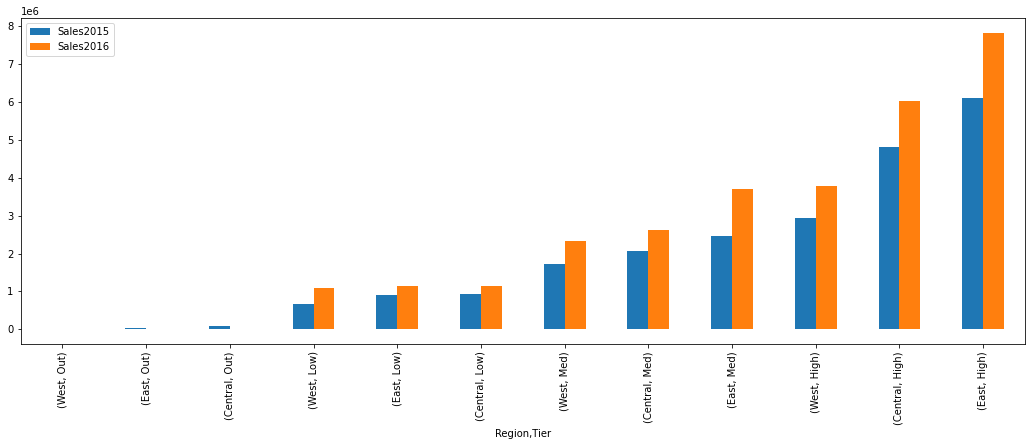

In [67]:
sales3 = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().round(2)

sales3graph=sales3.sort_values(by=['Sales2015','Sales2016']).plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

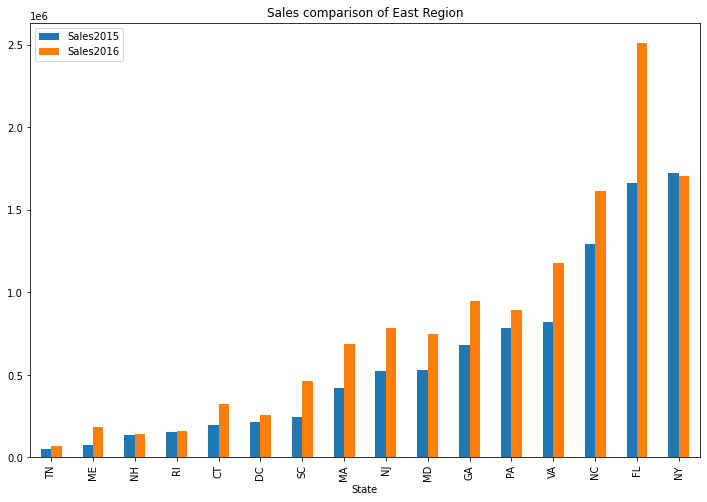

NY has a decline in 2016 as compared to 2015


In [68]:
East=sales.groupby(by=['Region','State'])[['Sales2015','Sales2016']].sum().round(0)
East=East.loc['East']

East.sort_values(by=['Sales2015','Sales2016']).plot(kind='bar',figsize=(12,8))
plt.title('Sales comparison of East Region')
plt.show()

print('NY has a decline in 2016 as compared to 2015')


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

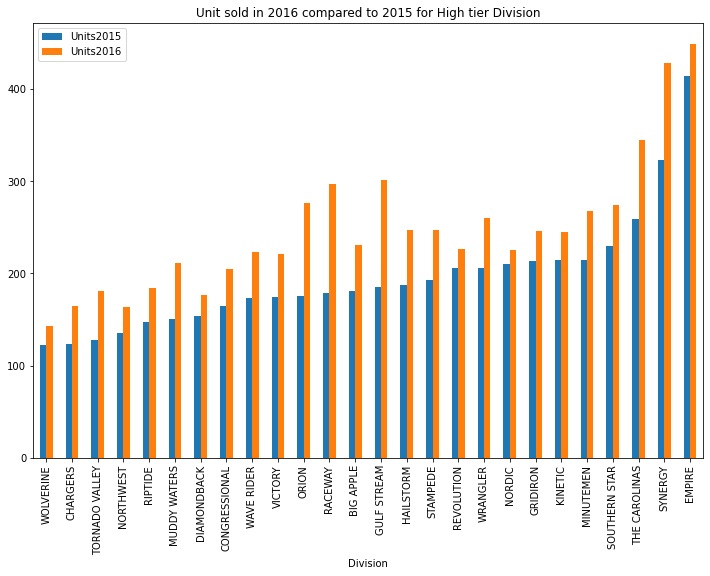

No division show decline in number of units sold in 2016 compared to 2015


In [69]:
High=sales.groupby(by=['Tier','Division'])[['Units2015','Units2016']].sum()
High=High.loc['High']
High.sort_values(by=['Units2015','Units2016']).plot(kind='bar',figsize=(12,8))
plt.title('Unit sold in 2016 compared to 2015 for High tier Division')
plt.show()

print("No division show decline in number of units sold in 2016 compared to 2015")

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [70]:
month=sales.Month

quarter = []
for x in month :
    if x in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [71]:
sales['Qtr']=quarter
sales.head(5)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


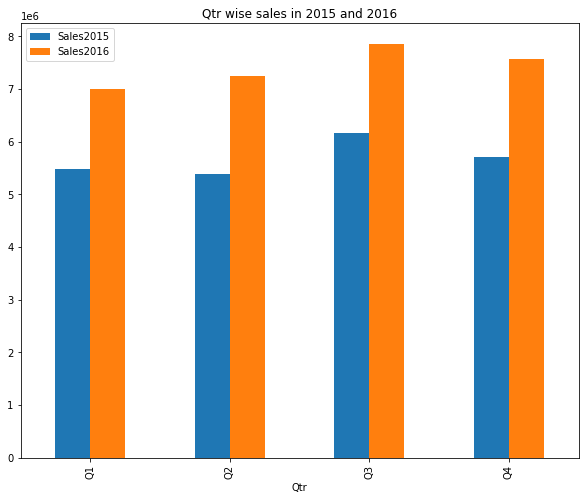

In [72]:
Qtr_sales=sales.groupby(by='Qtr')['Sales2015','Sales2016'].sum()
Qtr_sales.plot(kind='bar',figsize=(10,8))
plt.title('Qtr wise sales in 2015 and 2016')
plt.yticks()
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [78]:
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8.groupby(['Qtr','Tier']).Sales2016.sum()
sales8 = sales8.round(decimals=0)
sales8=pd.DataFrame(sales8)
sales8 = sales8.stack() # long to wide data
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


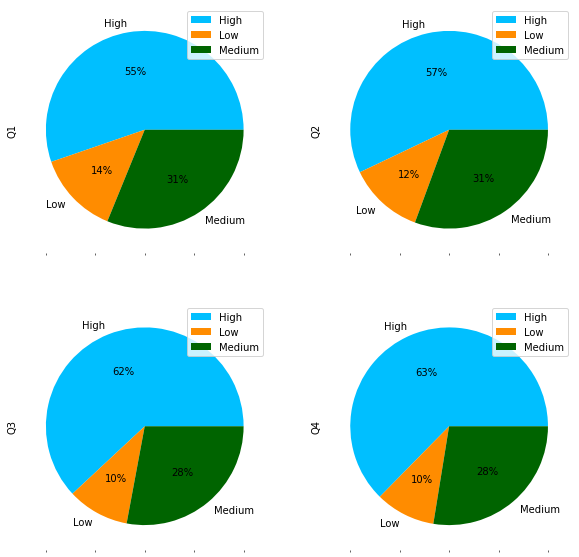

In [62]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()